      ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[1067 rows x 2 columns]


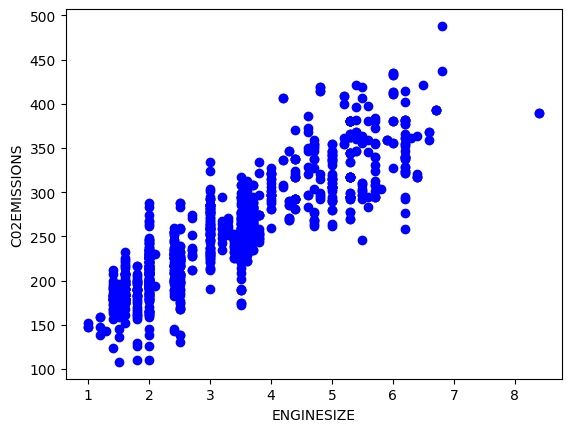

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

#read the csv file
data = pd.read_csv(r'venv/Fuel.csv')
data.head(5)

#selecting some features to explore
data = data[['ENGINESIZE', 'CO2EMISSIONS']]
print(data)

#plotting and visualising the explored data
plt.scatter(data['ENGINESIZE'], data['CO2EMISSIONS'], color ='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('C02EMISSIONS')
plt.show()

       Training the model and data plot for the linear regression based on its coefficients

coefficients:  [[38.79512384]]
intercept:  [127.16989951]


Text(0, 0.5, 'Emission')

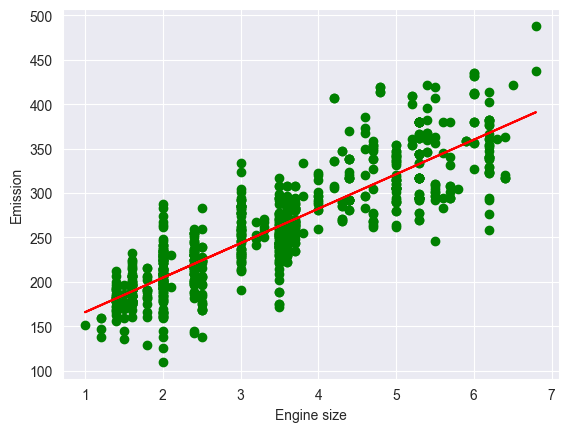

In [10]:
# Generating training  and testing data from our data
# we are using 80% data for training
train = data[:(int((len(data)*0.8)))]
test =  data[(int((len(data)*0.2))):]

# modeling
# using sklearn package to model data
regr = linear_model.LinearRegression()
train_x = np.array(train[['ENGINESIZE']])
train_y = np.array(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
# the coefficients
print('coefficients: ',regr.coef_)#slope
print('intercept: ',regr.intercept_)#intercept

#plotting the regression line: y =mx +c
plt.scatter(train['ENGINESIZE'], train['CO2EMISSIONS'], color='green')
#plotting the equation: y =mx +c
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Engine size')
plt.ylabel('Emission')

    Predicting the function

In [12]:
# predicting values:
# function for predicting future values:
def get_regression_predictions(input_features,intercept,slope):
    pred_values = input_features *slope + intercept
    return pred_values

In [13]:
# predicting emission for future car:
my_engine_size = 3.5
est_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print('Estimated emission : ', est_emission)

Estimated emission :  262.9528329350173


In [15]:
#checking various accuracy
from sklearn.metrics import r2_score
test_x = np.array(test[['ENGINESIZE']])
test_y = np.array(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)
print("Mean absolute error(MAE): %.2f" %np.mean(np.absolute(test_y_)))
print("Mean squared error(MSE): %.2f" %np.mean((test_y_ -test_y)**2))
print("R2-score : %.2f" %r2_score(test_y_,test_y))


Mean absolute error(MAE): 255.62
Mean squared error(MSE): 974.29
R2-score : 0.68
